<a href="https://colab.research.google.com/github/cow-coding/ML-DL-Study/blob/master/DL%20from%20Scratch/Chap02/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library import

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Perceptron
가중치(weight)와 입력신호(x)의 곱들로 연산  
임계값(thetha) 비교해서 0또는 1을 출력

## 설계 수식
$$
y = 
\begin{cases}
0 \quad (w_1x_1 + w_2x_2 \leq \theta)\\
1 \quad (w_1x_1 + w_2x_2 \gt \theta)
\end{cases}
$$

## AND Gate
|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

AND Gate는 두 입력($x_1 , x_2$)이 모두 1인 경우만 1을 출력한다.  
AND Gate perceptron 설계는 반드시 입력이 1인 경우에 임계값을 넘는 방식으로 설계한다.

In [ ]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1 * w1 + x2 * w2

  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

print(AND(0, 0)) # 0을 출력
print(AND(1, 0)) # 0을 출력
print(AND(0, 1)) # 0을 출력
print(AND(1, 1)) # 1을 출력

0
0
0
1


### Wegiht And Bias
가중치와 편향을 도입한 퍼셉트론을 만들어보자

**수식**  

$$
y = 
\begin{cases}
0 \quad (b+w_1x_1 + w_2x_2 \leq 0)\\
1 \quad (b+w_1x_1 + w_2x_2 \gt 0)
\end{cases}
$$  

앞서 작성한 수식과 동일하다. $\theta$를 이항시켜서 $b$로 기호를 변경하면 동일한 수식이다.

In [ ]:
x = np.array([0, 1])         # input
w = np.array([0.5, 0.5])  # weight
b = -0.7                    # bias

print(w * x)

print(np.sum(w * x))

print(np.sum(w * x) + b)

[0.  0.5]
0.5
-0.19999999999999996


AND 게이트를 수정해보자

In [ ]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7

  tmp = np.sum(w * x) + b

  if tmp <= 0:
    return 0
  else:
    return 1

## NAND Gate

|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|

NAND Gate는 두 입력($x_1 , x_2$)이 모두 1인 경우만 0을 출력한다.  
NAND Gate perceptron 설계는 편향($b$)이 음수인 AND Gate와 반대로 양수로 바꿔주면 된다.  


In [ ]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7

  tmp = np.sum(w * x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

## OR Gate

|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|

OR Gate는 두 입력($x_1 , x_2$)이 모두 0인 경우만 0을 출력한다.  
OR Gate perceptron 설계는 AND Gate 설계와 반대의 느낌으로 설계하면된다.

In [ ]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2

  tmp = np.sum(w * x) + b

  if tmp <= 0:
    return 0
  else:
    return 1

## XOR Gate

|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|

XOR Gate는 일반적인 방식으로는 만들 수가 없다.  
이유는 간단한데, 우리에게 주어지는 입력값은 다음과 같이 4개가 주어진다  
(0, 0), (0, 1), (1, 0), (1, 1)  
이 입력에 대해 XOR을 만족하기 위해서는 선형 그래프로는 구분할 수 없다.  
그래서 비선형인 곡선 형태로 그려야한다. 

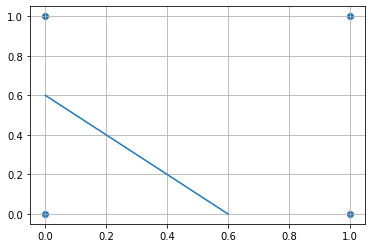

그렇다면 선형을 비선형으로 바꾸는 방법이 있을까?  
지금까지 만든 퍼셉트론은 모두 선형식을 가진 퍼셉트론이었다.  
이런 선형식들을 비선형으로 나오게하려면 어떻게 해야할까?  
기존에 존재하는 게이트들을 섞으면 된다.

일종의 합성함수와 같다고 생각하면 편하다.

|$x_1$|$x_2$|$s_1$|$s_2$|$y$|
|:---:|:---:|:---:|:---:|:---:|
|0|0|1|0|0|
|1|0|1|1|1|
|0|1|1|1|1|
|1|1|0|1|0|

기존에 제작한 NAND와 OR로 두 입력을 넣고  
두 게이트에서 나온 결과를 AND게이트릐 입력으로 넣으면된다

In [ ]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)

  return y

In [ ]:
print(XOR(0, 0)) # 0을 출력
print(XOR(1, 0)) # 1을 출력
print(XOR(0, 1)) # 1을 출력
print(XOR(1, 1)) # 0을 출력

0
1
1
0
